In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qwikidata.linked_data_interface import get_entity_dict_from_api
from qwikidata.entity import WikidataItem
import itertools
from collections import Counter
from tqdm.notebook import tqdm

from datetime import datetime

import plotly.express as px

pd.options.plotting.backend = "plotly"

In [2]:
plt.rc('axes', labelsize=14)   # fontsize of the x and y labels
plt.rc('axes', titlesize=14)
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=14)   # fontsize of the figure title
plt.rc('lines', markersize=7)
plt.rc('lines', linewidth=2)

In [3]:
df = pd.read_json('data\\nice_df_speakers.jsonl')

In [22]:
df

,n_quotes,age,nationality,gender,politics,sport,culture,academic
Q270316,21060,74,United States of America,female,1,0,0,0
Q1253,94704,77,Other,male,1,0,0,0
Q19874690,1207,62,Australia,male,0,0,0,0
Q5271548,1587,83,United States of America,female,0,0,0,1
Q2287947,132971,28,United States of America,male,0,0,0,0
...,...,...,...,...,...,...,...,...
Q4768868,16,68,Other,female,0,0,0,0
Q324294,10,54,Germany,male,0,0,0,0
Q2960831,14,83,United States of America,male,0,0,1,0
Q6712695,14,68,United States of America,female,0,0,0,1


In [4]:
df_male = df[df['gender']=='male']
df_female = df[df['gender']=='female']

# politics
df_male_politics = df_male[df_male['politics']==1]
df_male_politics = df_male[df_male['politics']==1]
df_male_politics_disagg = df_male_politics.loc[[c for a, b in zip(df_male_politics.index, df_male_politics['n_quotes']) for c in [a] * b]].reset_index(drop=True)
df_female_politics = df_female[df_female['politics']==1]
df_female_politics = df_female[df_female['politics']==1]
df_female_politics_disagg = df_female_politics.loc[[c for a, b in zip(df_female_politics.index, df_female_politics['n_quotes']) for c in [a] * b]].reset_index(drop=True)

# culture
df_male_culture = df_male[df_male['culture']==1]
df_male_culture_disagg = df_male_culture.loc[[c for a, b in zip(df_male_culture.index, df_male_culture['n_quotes']) for c in [a] * b]].reset_index(drop=True)
df_female_culture = df_female[df_female['culture']==1]
df_female_culture_disagg = df_female_culture.loc[[c for a, b in zip(df_female_culture.index, df_female_culture['n_quotes']) for c in [a] * b]].reset_index(drop=True)

# sports
df_male_sport = df_male[df_male['sport']==1]
df_male_sport_disagg = df_male_sport.loc[[c for a, b in zip(df_male_sport.index, df_male_sport['n_quotes']) for c in [a] * b]].reset_index(drop=True)
df_female_sport = df_female[df_female['sport']==1]
df_female_sport_disagg = df_female_sport.loc[[c for a, b in zip(df_female_sport.index, df_female_sport['n_quotes']) for c in [a] * b]].reset_index(drop=True)

In [5]:
male_ages = Counter(df_male_politics.age)
y_male = np.asarray(list(male_ages.values()))
y_male = y_male/y_male.sum()
female_ages = Counter(df_female_politics.age)
y_female = np.asarray(list(female_ages.values()))
y_female = y_female/y_female.sum()

In [17]:
mean_male= sum(key * count for key, count in male_ages.items()) / sum(male_ages.values())
N_male = sum(male_ages.values())
print(mean_male)


mean_female= sum(key * count for key, count in female_ages.items()) / sum(female_ages.values())
N_female = sum(male_ages.values())
print(mean_female)

65.12139231876372
61.24156692056583


In [30]:
from scipy.stats import ttest_ind
a = df_male_politics.age
b = df_female_politics.age
print(f'{a.mean() = }')
print(f'{b.mean() = }')

ttest_ind(a, b, alternative='greater')

a.mean() = 65.12139231876372
b.mean() = 61.24156692056583


Ttest_indResult(statistic=19.837509024680916, pvalue=2.217765739367745e-87)

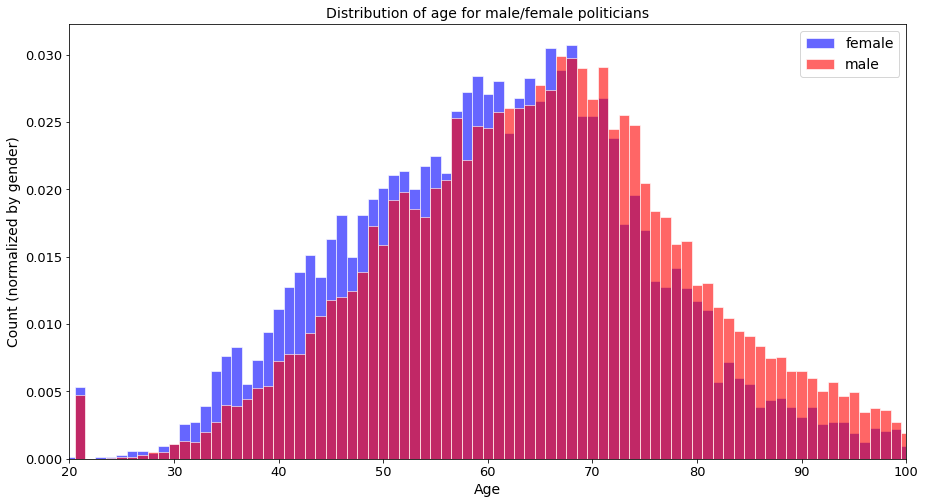

In [6]:
fig = plt.figure(figsize=(15,8))


plt.bar(female_ages.keys(), y_female, align='center', width=1, alpha=0.6, facecolor='blue', edgecolor='w', label='female')
plt.bar(male_ages.keys(), y_male, align='center', width=1, alpha=0.6, facecolor='red', edgecolor='w', label='male')
# plt.yscale('log')
plt.xlabel('Age')
plt.ylabel('Count (normalized by gender)')
plt.title('Distribution of age for male/female politicians')
plt.xlim([20, 100])
plt.legend()
plt.show()

In [11]:
df_politics = df[df['politics']==1]

df_politics = df_politics[df_politics['gender']!=0]
df_politics = df_politics.sort_values(by='age')

In [26]:
color_discrete_map={
    "male":"blue", 
    "female":"red"}

fig = px.histogram(df_politics, 
                    x="age", 
                    color="gender", 
                    barmode="overlay",
                    histnorm="probability",
                    range_x=[0, 100],
                    width=1000, height=500,
                    color_discrete_map=color_discrete_map,
                    title=f"Distribution of age in male and female politicians")
fig.update_layout(yaxis_title="Number of speakers")
fig.update_xaxes(type='category')
fig.update_layout(
    template=None,
    font_family='Nunito',
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
    )
)
fig.show()
#fig.write_html("politics_gender.html")

In [34]:
df_sport = df[df['sport']==1]

df_sport = df_sport[df_sport['gender']!=0]
df_sport = df_sport.sort_values(by='age')

color_discrete_map={
    "male":"blue", 
    "female":"red"}

fig = px.histogram(df_sport, 
                    x="age", 
                    color="gender", 
                    barmode="overlay",
                    histnorm="probability",
                    range_x=[0, 100],
                    width=1000, height=500,
                    color_discrete_map=color_discrete_map,
                    title=f"Distribution of age in male and female athletes")
fig.update_layout(yaxis_title="Number of speakers")
fig.update_xaxes(type='category')
fig.update_layout(
    template=None,
    font_family='Nunito',
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
    )
)
fig.show()

In [38]:
df_culture = df[df['culture']==1]

df_culture = df_culture[df_culture['gender']!=0]
df_culture = df_culture.sort_values(by='age')

color_discrete_map={
    "male":"blue", 
    "female":"red"}

fig = px.histogram(df_culture, 
                    x="age", 
                    color="gender", 
                    barmode="overlay",
                    histnorm="probability",
                    range_x=[0, 100],
                    width=1000, height=500,
                    color_discrete_map=color_discrete_map,
                    title=f"Distribution of age in male and female in culture")
fig.update_layout(yaxis_title="Number of speakers")
fig.update_xaxes(type='category')
fig.update_layout(
    template=None,
    font_family='Nunito',
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
    )
)
fig.show()